In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("logistic_regression.csv")
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
# The data is pretty big for analysis
data.shape

(396030, 27)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [7]:
data.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


In [9]:
# The data has considerable outliers
data.isna().sum()

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [10]:
#Extracting the ZIP code from address and converting it to categorical value
data['zip_code'] = data['address'].str.split().str[::-1].str[0]
data['zip_code'] = data['zip_code'].astype('category')

In [37]:
# Since the address has too much categories and it is hard for conversion we drop it
data.drop(columns='address', inplace=True)

In [11]:
# Extracting number from string and then converting it to numerical value
data['term'] = data['term'].str.split().str[0]
data['term'] = data['term'].astype(np.float64)

In [12]:
def year_transform(year):
    if pd.isna(year):
        return np.NaN
    
    year_number = year.split(' ')
    year_number = year_number[0]    
    if year_number in ('1', '2', '3', '4', '5', '6', '7', '8', '9'):
        return float( year_number)
    elif year_number == "<":
        return 0
    elif year_number == "10+":
        return 10

In [13]:
# Extracting year from string
data['emp_length'] = data['emp_length'].apply(year_transform)

In [15]:
# Converting target variable to binary number
data.loc[data['loan_status'] == 'Fully Paid','loan_status'] = 1
data.loc[data['loan_status'] == 'Charged Off','loan_status'] = 0
data['loan_status'] = data['loan_status'].astype(int)

In [18]:
# The data is imbalanced and needs to balanced before training
data['loan_status'].value_counts(normalize=True)

loan_status
1    0.803871
0    0.196129
Name: proportion, dtype: float64

In [19]:
pearson_corr = data.select_dtypes('number').corr(method='pearson')
pearson_corr

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.393862,0.168921,0.953929,0.100087,0.336887,-0.059836,0.016636,0.198556,-0.077779,0.328320,0.099911,0.223886,0.222315,-0.106539
term,0.393862,1.000000,0.434594,0.153378,0.060633,0.060330,-0.173246,0.036508,0.079575,-0.018758,0.084787,0.055166,0.101346,0.096220,-0.019826
int_rate,0.168921,0.434594,1.000000,0.162758,0.012464,-0.056771,-0.247758,0.079038,0.011649,0.060986,-0.011280,0.293659,-0.036404,-0.082583,0.057450
installment,0.953929,0.153378,0.162758,1.000000,0.088601,0.330381,-0.041082,0.015786,0.188973,-0.067892,0.316455,0.123915,0.202430,0.193694,-0.098628
emp_length,0.100087,0.060633,0.012464,0.088601,1.000000,0.067569,0.013734,0.041697,0.043565,0.037494,0.087731,0.038223,0.117836,0.198494,0.038690
annual_inc,0.336887,0.060330,-0.056771,0.330381,0.067569,1.000000,0.053432,-0.081685,0.136150,-0.013720,0.299773,0.027871,0.193023,0.236320,-0.050162
loan_status,-0.059836,-0.173246,-0.247758,-0.041082,0.013734,0.053432,1.000000,-0.062413,-0.028012,-0.019933,0.010892,-0.082373,0.017893,0.073111,-0.009383
dti,0.016636,0.036508,0.079038,0.015786,0.041697,-0.081685,-0.062413,1.000000,0.136181,-0.017639,0.063571,0.088375,0.102128,-0.025439,-0.014558
open_acc,0.198556,0.079575,0.011649,0.188973,0.043565,0.136150,-0.028012,0.136181,1.000000,-0.018392,0.221192,-0.131420,0.680728,0.109205,-0.027732
pub_rec,-0.077779,-0.018758,0.060986,-0.067892,0.037494,-0.013720,-0.019933,-0.017639,-0.018392,1.000000,-0.101664,-0.075910,0.019723,0.011552,0.699408


<Axes: >

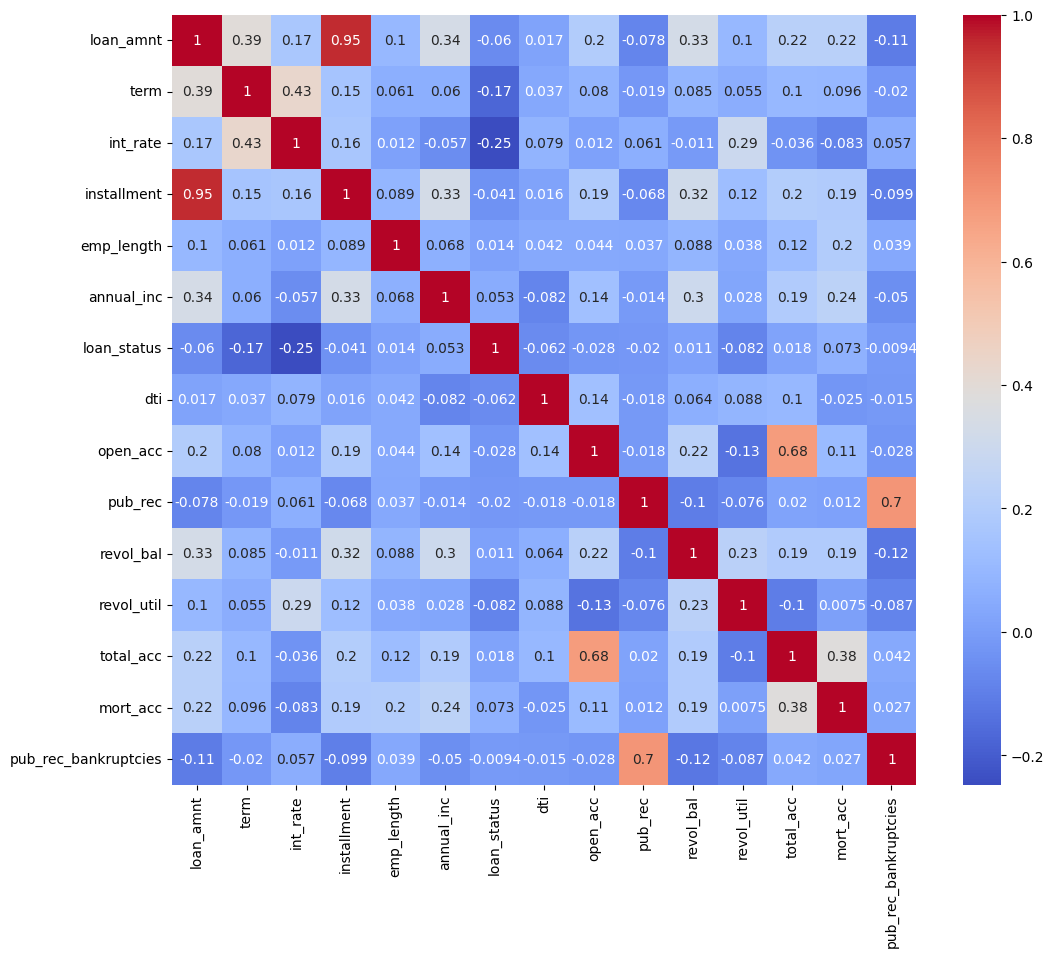

In [20]:
plt.figure(figsize=(12,10))
sns.heatmap(pearson_corr, annot=True, cmap='coolwarm')

In [21]:
spearman_corr = data.select_dtypes('number').corr(method='spearman')
spearman_corr

,loan_amnt,term,int_rate,installment,emp_length,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.411597,0.131432,0.968334,0.105127,0.488566,-0.062751,0.053118,0.215244,-0.100435,0.469646,0.104708,0.237115,0.231240,-0.108661
term,0.411597,1.000000,0.413953,0.214613,0.060888,0.129950,-0.173246,0.080946,0.083490,-0.019935,0.144627,0.055800,0.106423,0.112856,-0.020507
int_rate,0.131432,0.413953,1.000000,0.137293,0.010259,-0.096648,-0.244552,0.172123,0.004181,0.072204,0.005948,0.303990,-0.050880,-0.102962,0.060848
installment,0.968334,0.214613,0.137293,1.000000,0.096434,0.470464,-0.049342,0.055538,0.207828,-0.093357,0.460147,0.131628,0.216667,0.201861,-0.102922
emp_length,0.105127,0.060888,0.010259,0.096434,1.000000,0.143347,0.014596,0.041587,0.054157,0.049424,0.133089,0.036976,0.133757,0.230110,0.043053
annual_inc,0.488566,0.129950,-0.096648,0.470464,0.143347,1.000000,0.086243,-0.202856,0.240468,-0.046322,0.393232,0.060172,0.334453,0.378772,-0.071770
loan_status,-0.062751,-0.173246,-0.244552,-0.049342,0.014596,0.086243,1.000000,-0.127794,-0.027098,-0.018509,-0.002671,-0.081028,0.020674,0.079562,-0.008439
dti,0.053118,0.080946,0.172123,0.055538,0.041587,-0.202856,-0.127794,1.000000,0.322745,-0.042220,0.249720,0.185130,0.236925,-0.048033,-0.032790
open_acc,0.215244,0.083490,0.004181,0.207828,0.054157,0.240468,-0.027098,0.322745,1.000000,-0.019111,0.364325,-0.139233,0.672232,0.142336,-0.025244
pub_rec,-0.100435,-0.019935,0.072204,-0.093357,0.049424,-0.046322,-0.018509,-0.042220,-0.019111,1.000000,-0.209249,-0.095391,0.033317,0.031729,0.862245


<Axes: >

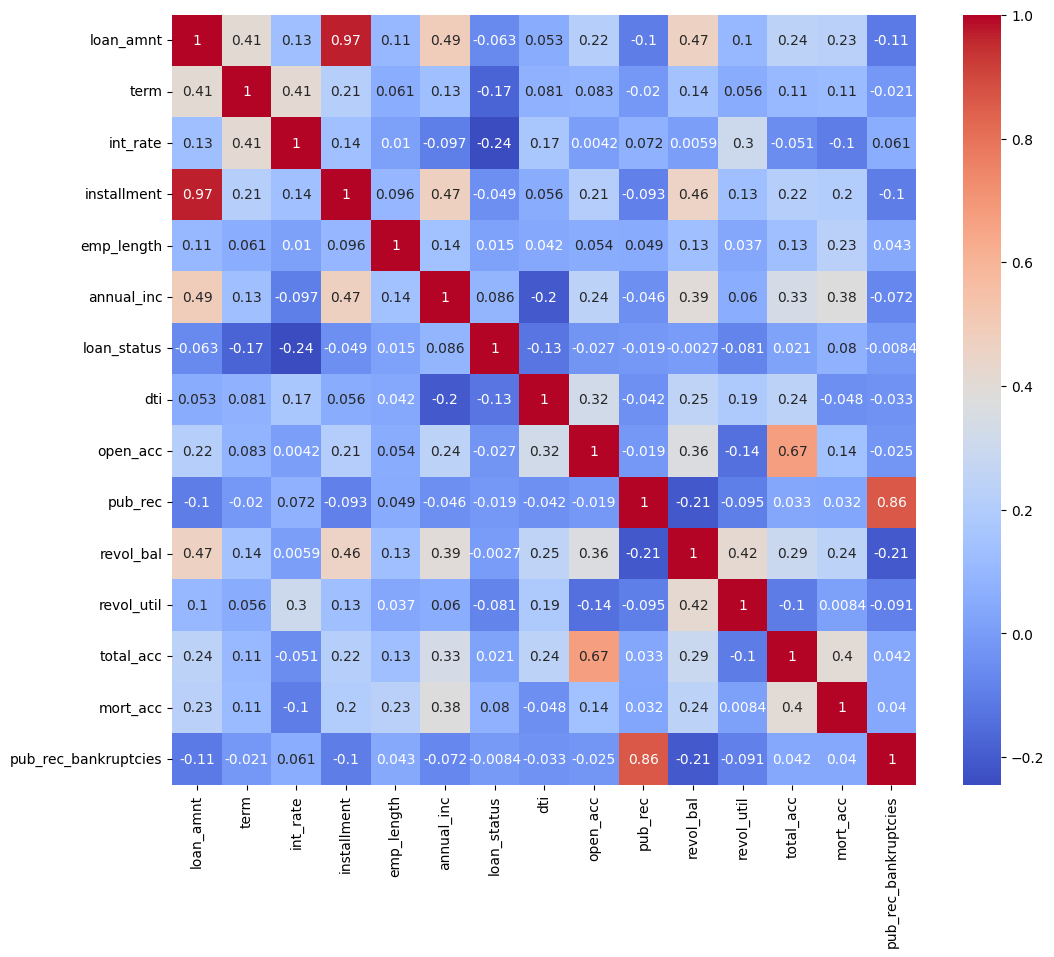

In [22]:
plt.figure(figsize=(12,10))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm')

In [23]:
# Both the spearman and pearson correlation show that loan_amount and installment have a correlation greater than 0.95
# So we drop either of them 
data.drop(columns=['installment'], inplace=True)

In [24]:
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

In [25]:
# As the NONE and ANY type are very less we convert them to OTHER Type
data.loc[(data['home_ownership']=="ANY") | (data['home_ownership']=="NONE"), "home_ownership"] = "OTHER"

In [26]:
data['home_ownership'] = data['home_ownership'].astype('category')
data['home_ownership'].value_counts()

home_ownership
MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          146
Name: count, dtype: int64

In [29]:
data['grade'].value_counts()

grade
B    116018
C    105987
A     64187
D     63524
E     31488
F     11772
G      3054
Name: count, dtype: int64

In [28]:
# The grade has a higher power to higher grade so we assign it in order
data['grade'] = pd.Categorical(data['grade'], categories=['A', 'B', 'C', 'D', 'E', 'F', 'G'], ordered=True)

In [30]:
data['sub_grade'].value_counts()

sub_grade
B3    26655
B4    25601
C1    23662
C2    22580
B2    22495
B5    22085
C3    21221
C4    20280
B1    19182
A5    18526
C5    18244
D1    15993
A4    15789
D2    13951
D3    12223
D4    11657
A3    10576
A1     9729
D5     9700
A2     9567
E1     7917
E2     7431
E3     6207
E4     5361
E5     4572
F1     3536
F2     2766
F3     2286
F4     1787
F5     1397
G1     1058
G2      754
G3      552
G4      374
G5      316
Name: count, dtype: int64

In [31]:
# like grade this also has order
data['sub_grade'] = pd.Categorical(data['sub_grade'], categories=[  'A1','A2','A3','A4','A5', 
                                                                  'B1', 'B2', 'B3', 'B4', 'B5', 
                                                                  'C1','C2','C3','C4','C5', 
                                                                  'D1', 'D2', 'D3', 'D4', 'D5',
                                                                  'E1','E2','E3','E4','E5', 
                                                                  'F1', 'F2', 'F3', 'F4', 'F5',
                                                                  'G1','G2','G3','G4','G5'], ordered=True)

In [32]:
data['verification_status'] = data['verification_status'].astype('category')

In [33]:
# Converting date columns to date type from strings
data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
data['issue_d'] = pd.to_datetime(data['issue_d'])

C:\Users\Saurabh\AppData\Local\Temp\ipykernel_90900\2340632188.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['earliest_cr_line'] = pd.to_datetime(data['earliest_cr_line'])
C:\Users\Saurabh\AppData\Local\Temp\ipykernel_90900\2340632188.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['issue_d'] = pd.to_datetime(data['issue_d'])


In [34]:
# extracting month and year from date info
data['earliest_cr_line_month'] = data['earliest_cr_line'].dt.month
data['earliest_cr_line_year'] = data['earliest_cr_line'].dt.year

data['issue_d_month'] = data['issue_d'].dt.month
data['issue_d_year'] = data['issue_d'].dt.year

In [35]:
data.drop(columns=['earliest_cr_line','issue_d'], inplace=True)

In [38]:
pd.set_option('display.max_columns', None)
data.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,title,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year
0,10000.0,36.0,11.44,B,B4,Marketing,10.0,RENT,117000.0,Not Verified,1,vacation,Vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690,6,1990,1,2015
1,8000.0,36.0,11.99,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,Debt consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113,7,2004,1,2015
2,15600.0,36.0,10.49,B,B3,Statistician,0.0,RENT,43057.0,Source Verified,1,credit_card,Credit card refinancing,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113,8,2007,1,2015
3,7200.0,36.0,6.49,A,A2,Client Advocate,6.0,RENT,54000.0,Not Verified,1,credit_card,Credit card refinancing,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813,9,2006,11,2014
4,24375.0,60.0,17.27,C,C5,Destiny Management Inc.,9.0,MORTGAGE,55000.0,Verified,0,credit_card,Credit Card Refinance,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650,3,1999,4,2013


In [41]:
data['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [40]:
data['purpose'] = data['purpose'].astype('category')

In [44]:
data['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [45]:
#Since there are too many titles and this column also tends to give same info as purpose we drop this column
# There are also many spelling mistakes for handling 
data.drop(columns='title', inplace=True)

In [46]:
data['initial_list_status'] = data['initial_list_status'].astype('category')

In [52]:
data['application_type'] = data['application_type'].astype('category')

In [53]:
# Since there are too many titles and cannot be converted using encoding we drop this column
data['emp_title'].nunique()

173105

In [54]:
data.drop(columns='emp_title', inplace=True)

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype   
---  ------                  --------------   -----   
 0   loan_amnt               396030 non-null  float64 
 1   term                    396030 non-null  float64 
 2   int_rate                396030 non-null  float64 
 3   grade                   396030 non-null  category
 4   sub_grade               396030 non-null  category
 5   emp_length              377729 non-null  float64 
 6   home_ownership          396030 non-null  category
 7   annual_inc              396030 non-null  float64 
 8   verification_status     396030 non-null  category
 9   loan_status             396030 non-null  int32   
 10  purpose                 396030 non-null  category
 11  dti                     396030 non-null  float64 
 12  open_acc                396030 non-null  float64 
 13  pub_rec                 396030 non-null  float64 
 14  revo

In [56]:
data.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                18301
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                  276
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37795
pub_rec_bankruptcies        535
zip_code                      0
earliest_cr_line_month        0
earliest_cr_line_year         0
issue_d_month                 0
issue_d_year                  0
dtype: int64

In [57]:
data_copy = data.copy()

- We remove the outliers from numerical column of revol_util

In [58]:
# Function to remove outliers from specified columns
def remove_outliers(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    # Filter the dataframe to exclude outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Apply the function to the dataframe
data_copy = remove_outliers(data_copy, 'revol_util')

In [59]:
data_copy.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                18289
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37740
pub_rec_bankruptcies        535
zip_code                      0
earliest_cr_line_month        0
earliest_cr_line_year         0
issue_d_month                 0
issue_d_year                  0
dtype: int64

In [60]:
# Since pub_rec_bankruptcies have very less na values we drop the rows
data_copy.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [61]:
data_copy.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                18289
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37205
pub_rec_bankruptcies          0
zip_code                      0
earliest_cr_line_month        0
earliest_cr_line_year         0
issue_d_month                 0
issue_d_year                  0
dtype: int64

In [62]:
from sklearn.impute import KNNImputer

In [63]:
data_copy.shape

(395207, 26)

- We use the KNN imputer for imputing the emp_lenght as it depends on other features
- Also we cannot directly assign mean or median or mode , it will make the data bias

In [64]:
imputer = KNNImputer(n_neighbors=5)

data_copy['emp_length'] = imputer.fit_transform(data_copy[['emp_length']])

data_copy['emp_length'] = round(data_copy['emp_length'],0)

In [66]:
data_copy.isna().sum()

loan_amnt                     0
term                          0
int_rate                      0
grade                         0
sub_grade                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
application_type              0
mort_acc                  37205
pub_rec_bankruptcies          0
zip_code                      0
earliest_cr_line_month        0
earliest_cr_line_year         0
issue_d_month                 0
issue_d_year                  0
dtype: int64

- For mort_acc we fill the empty values with the mean of group by total_acc 
- As higher total_acc generally have higher mort_acc
- We merge the data and impute accordingly

In [67]:
data_mort = round(data_copy.groupby('total_acc')[['mort_acc']].mean(),0).reset_index()
data_mort

,total_acc,mort_acc
0,2.0,0.0
1,3.0,0.0
2,4.0,0.0
3,5.0,0.0
4,6.0,0.0
...,...,...
113,124.0,1.0
114,129.0,1.0
115,135.0,3.0
116,150.0,2.0


In [68]:
data_merged = data_copy.merge(data_mort, how='left',on='total_acc', suffixes=('','_mean'))
data_merged

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip_code,earliest_cr_line_month,earliest_cr_line_year,issue_d_month,issue_d_year,mort_acc_mean
0,10000.0,36.0,11.44,B,B4,10.0,RENT,117000.0,Not Verified,1,vacation,26.24,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,22690,6,1990,1,2015,2.0
1,8000.0,36.0,11.99,B,B5,4.0,MORTGAGE,65000.0,Not Verified,1,debt_consolidation,22.05,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,05113,7,2004,1,2015,2.0
2,15600.0,36.0,10.49,B,B3,0.0,RENT,43057.0,Source Verified,1,credit_card,12.79,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,05113,8,2007,1,2015,2.0
3,7200.0,36.0,6.49,A,A2,6.0,RENT,54000.0,Not Verified,1,credit_card,2.60,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,00813,9,2006,11,2014,1.0
4,24375.0,60.0,17.27,C,C5,9.0,MORTGAGE,55000.0,Verified,0,credit_card,33.95,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,11650,3,1999,4,2013,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395202,10000.0,60.0,10.99,B,B4,2.0,RENT,40000.0,Source Verified,1,debt_consolidation,15.63,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,30723,11,2004,10,2015,2.0
395203,21000.0,36.0,12.29,C,C1,5.0,MORTGAGE,110000.0,Source Verified,1,debt_consolidation,21.45,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,05113,2,2006,2,2015,0.0
395204,5000.0,36.0,9.99,B,B1,10.0,RENT,56500.0,Verified,1,debt_consolidation,17.56,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,70466,3,1997,10,2013,2.0
395205,21000.0,60.0,15.31,C,C2,10.0,MORTGAGE,64000.0,Verified,1,debt_consolidation,15.88,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,29597,11,1990,8,2012,1.0


In [69]:
data_merged['mort_acc'].fillna(data_merged['mort_acc_mean']).isna().sum()

0

In [70]:
data_merged['mort_acc'] = data_merged['mort_acc'].fillna(data_merged['mort_acc_mean'])

In [71]:
data_merged.drop(columns='mort_acc_mean', inplace=True)

In [72]:
data_merged.isna().sum()

loan_amnt                 0
term                      0
int_rate                  0
grade                     0
sub_grade                 0
emp_length                0
home_ownership            0
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
open_acc                  0
pub_rec                   0
revol_bal                 0
revol_util                0
total_acc                 0
initial_list_status       0
application_type          0
mort_acc                  0
pub_rec_bankruptcies      0
zip_code                  0
earliest_cr_line_month    0
earliest_cr_line_year     0
issue_d_month             0
issue_d_year              0
dtype: int64

In [73]:
data = data_merged

- We check for how much percentage of outliers are present in the dataset for each numrical columns

<Axes: xlabel='None'>

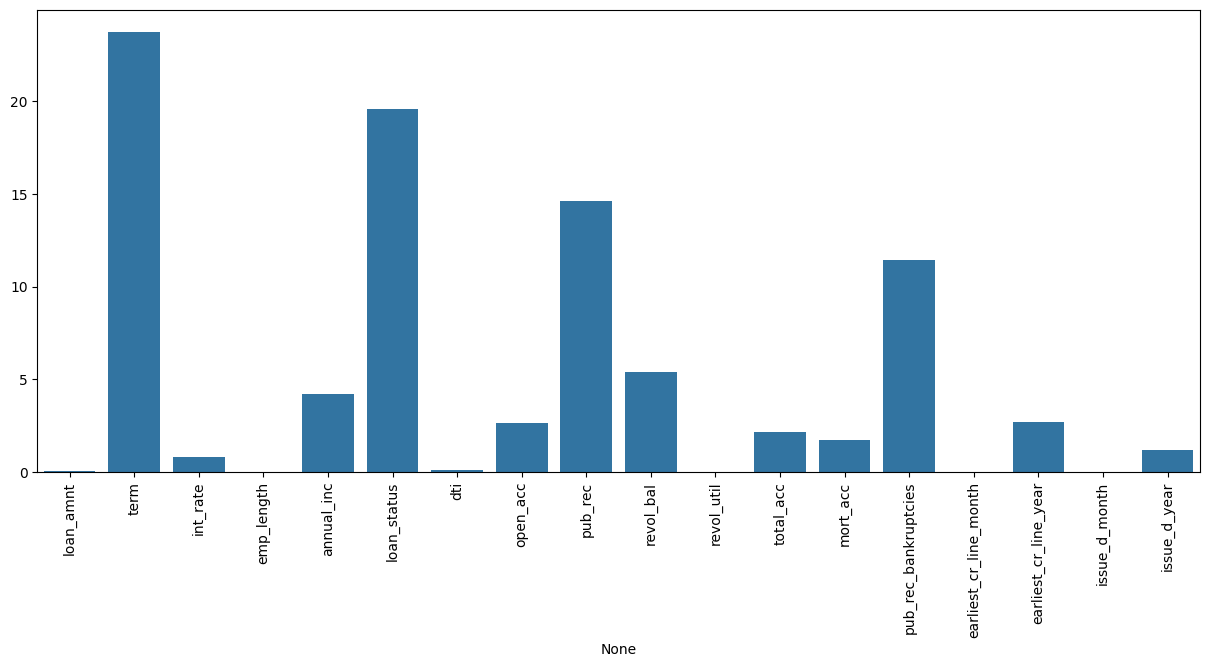

In [74]:
percentage = []
for i in data.select_dtypes('number').columns:
    upper = data[i].quantile(0.75)
    lower = data[i].quantile(0.25)

    iqr = upper - lower
    rows = len(data[(data[i] > upper + 1.5*iqr) | (data[i] < lower - 1.5*iqr)])
    percentage.append(rows/len(data)*100)

plt.figure(figsize=(15,6))
plt.xticks(rotation=90)
sns.barplot(x=data.select_dtypes('number').columns, y =percentage)

- If we remove all the outliers we will lose a lot of data
- We only remove outliers from specific columns that we know are necessary 

In [75]:
#Removing Outliers only for specific columns as we do not want to lose our data
for i in ['loan_amnt','int_rate','dti', 'revol_bal','revol_util']:
    upper = data[i].quantile(0.75)
    lower = data[i].quantile(0.25)

    iqr = upper - lower
    data = data[(data[i] <= upper + 1.5*iqr) & (data[i] >= lower - 1.5*iqr)]    

In [76]:
data.shape

(370649, 26)

# Visual Analysis

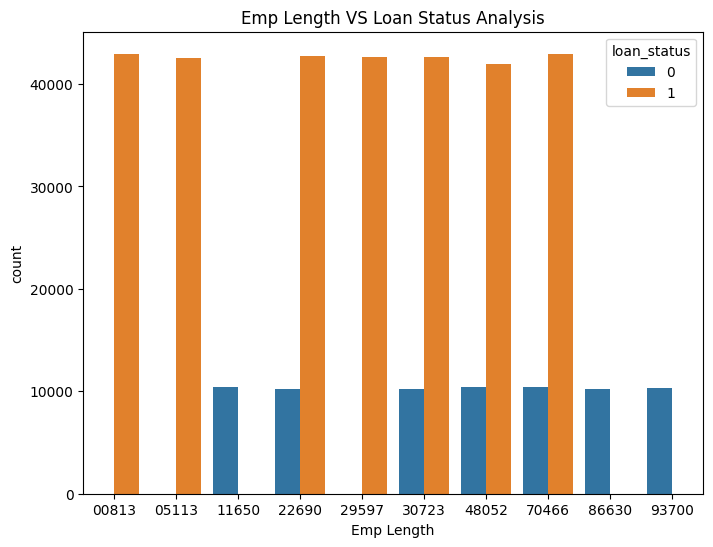

In [131]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x = 'zip_code', hue ='loan_status')
plt.title('Emp Length VS Loan Status Analysis')
plt.xlabel('Emp Length')
plt.show()

- certain zip codes are where all loans are cleared but there are also areas where loan is not cleared
- This shows that zip code may have a greater impact on the model

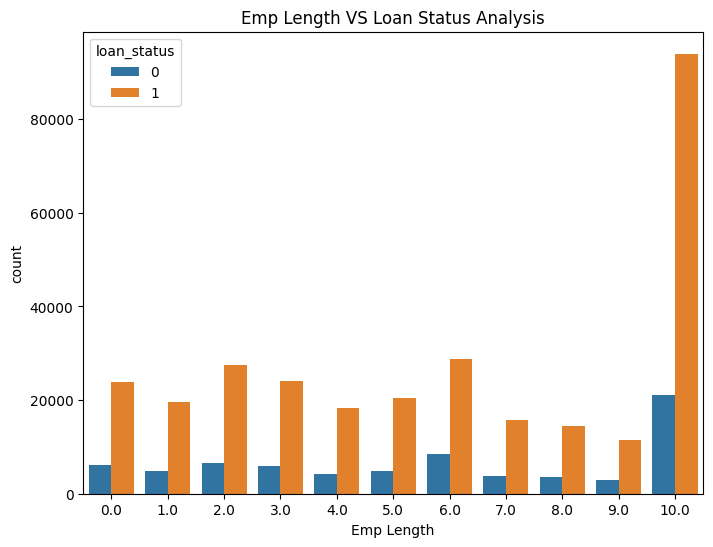

In [127]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x = 'emp_length', hue ='loan_status')
plt.title('Emp Length VS Loan Status Analysis')
plt.xlabel('Emp Length')
plt.show()

- employees with 10 or more year of experiance are clearing the loan more compared to others

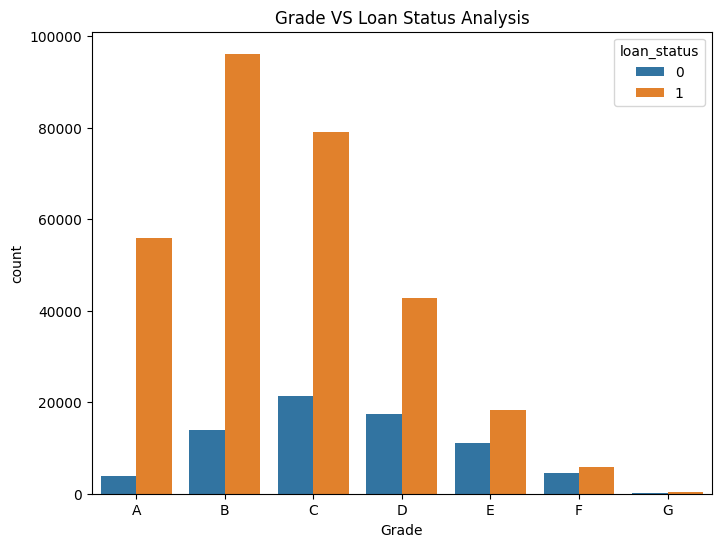

In [77]:
plt.figure(figsize=(8,6))
sns.countplot(data=data, x = 'grade', hue ='loan_status')
plt.title('Grade VS Loan Status Analysis')
plt.xlabel('Grade')
plt.show()

- Clearly The grade A,B and C have the highest loan paying 
- The grade G has none or near 0 

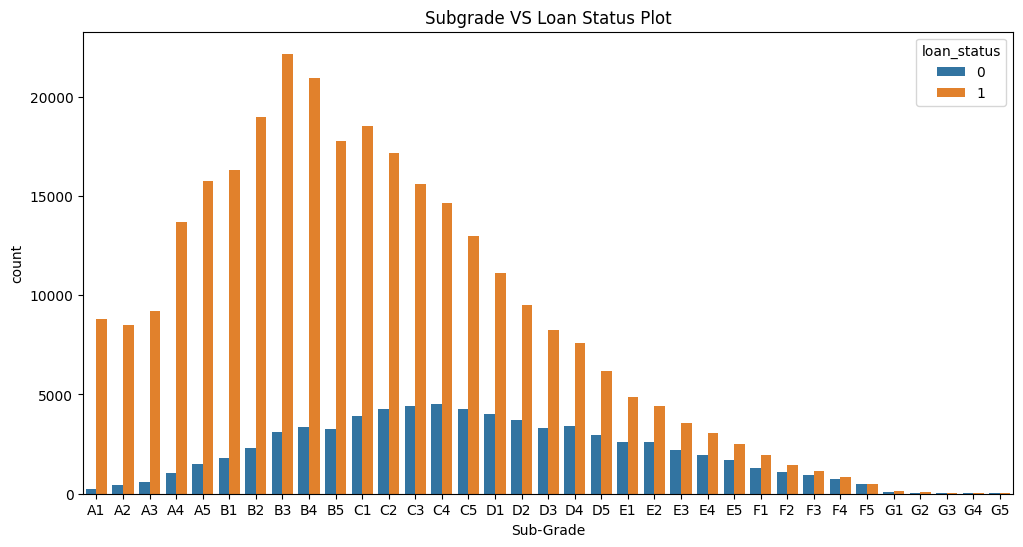

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(data=data, x = 'sub_grade', hue ='loan_status')
plt.title('Subgrade VS Loan Status Plot')
plt.xlabel('Sub-Grade')
plt.show()

- The sub-grade B2, B3 and B4 are the highest number loan clearers
- The sub-grade C3, C4 and C5 are the highest number loan defaulters

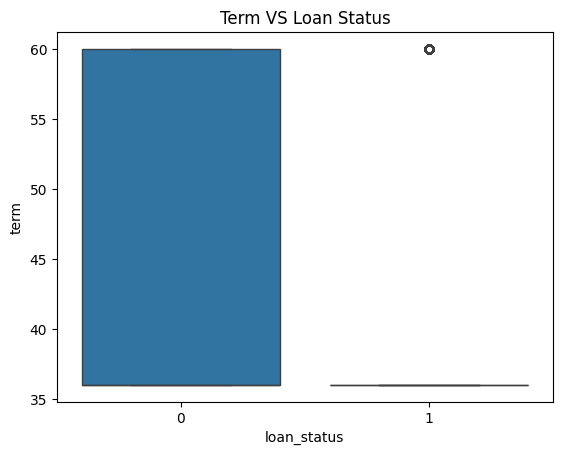

In [79]:
sns.boxplot(data=data, y = 'term', x='loan_status')
plt.title('Term VS Loan Status')
plt.show()

- The loan defaulters generally go for higher loan term

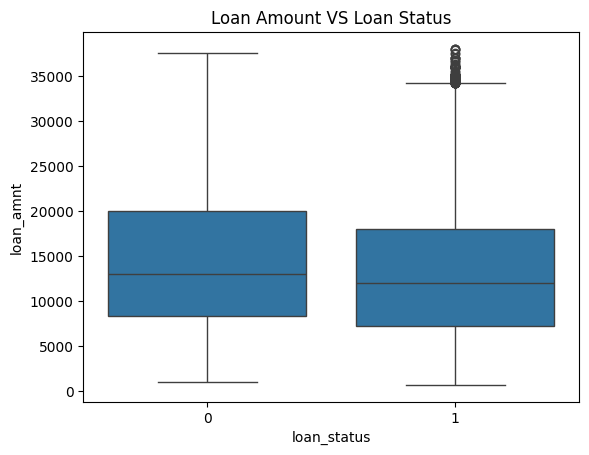

In [80]:
sns.boxplot(data=data, y = 'loan_amnt', x='loan_status')
plt.title('Loan Amount VS Loan Status')
plt.show()

- There is no significant diff in loan amount as per loan status

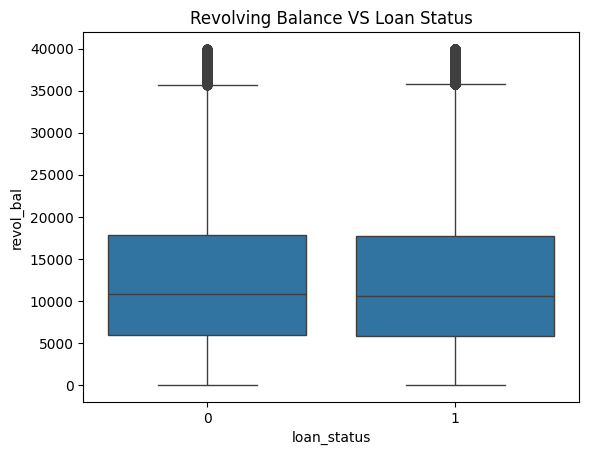

In [81]:
sns.boxplot(data=data, y = 'revol_bal', x='loan_status')
plt.title('Revolving Balance VS Loan Status')
plt.show()

- Revolving balance for both loan status are same

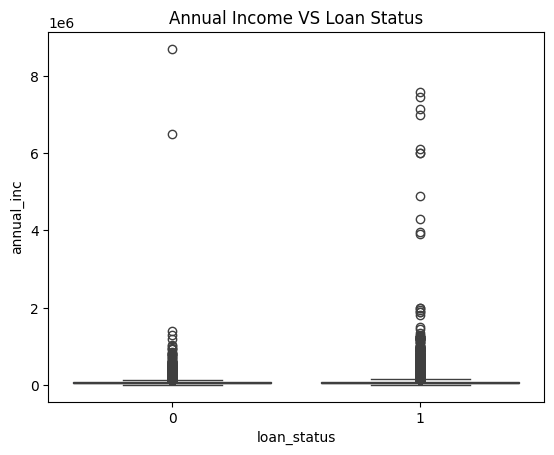

In [82]:
sns.boxplot(data=data, y = 'annual_inc', x='loan_status')
plt.title('Annual Income VS Loan Status')
plt.show()

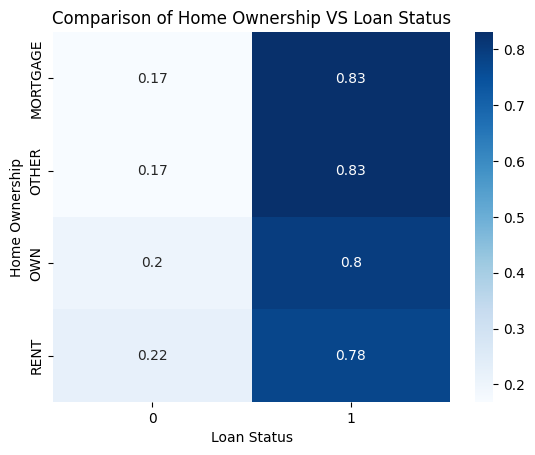

In [87]:
plt.title('Comparison of Home Ownership VS Loan Status')
sns.heatmap(pd.crosstab(data['home_ownership'],data['loan_status'], normalize='index'), annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Home Ownership')
plt.show()

- If the person has a mortgage property the loan is more likely to be paid

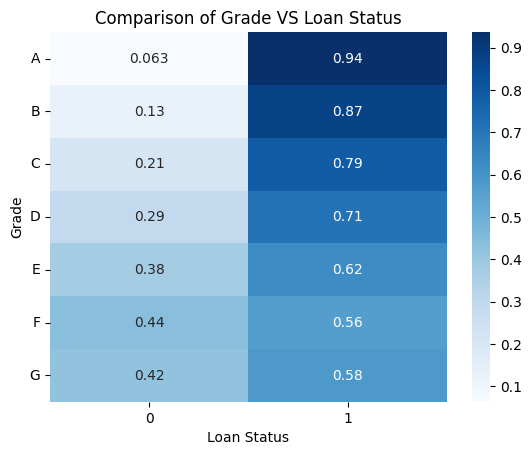

In [88]:
plt.title('Comparison of Grade VS Loan Status')
sns.heatmap(pd.crosstab(data['grade'],data['loan_status'], normalize='index'), annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Grade')
plt.yticks(rotation=0)
plt.show()

- Higher the grade the loan has higher chances of getting paid

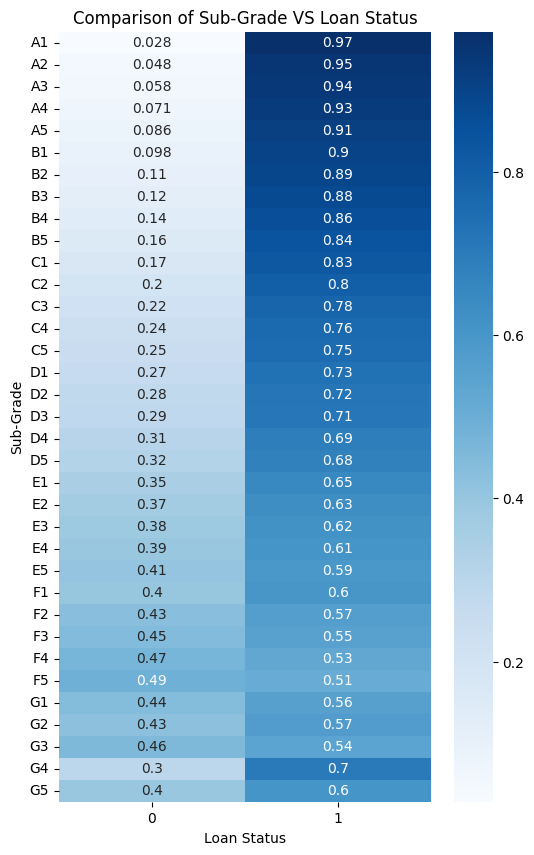

In [89]:
plt.figure(figsize=(6,10))
plt.title('Comparison of Sub-Grade VS Loan Status')
sns.heatmap(pd.crosstab(data['sub_grade'],data['loan_status'], normalize='index'), annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Sub-Grade')
plt.yticks(rotation=0)
plt.show()

- Higher the sub-grade the loan has higher chances of getting paid

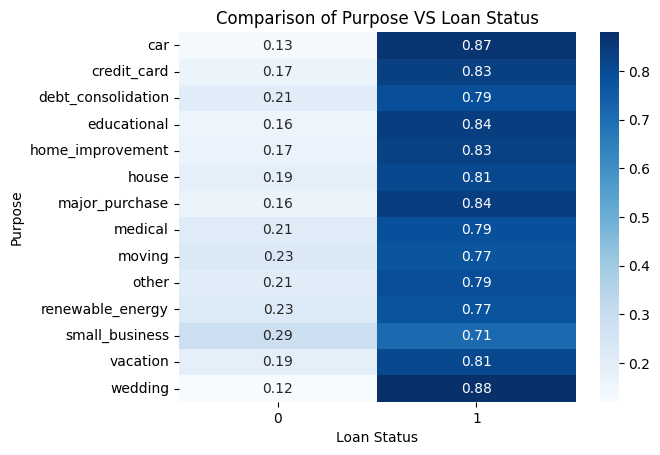

In [91]:
plt.title('Comparison of Purpose VS Loan Status')
sns.heatmap(pd.crosstab(data['purpose'],data['loan_status'], normalize='index'), annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Purpose')
plt.yticks(rotation=0)
plt.show()

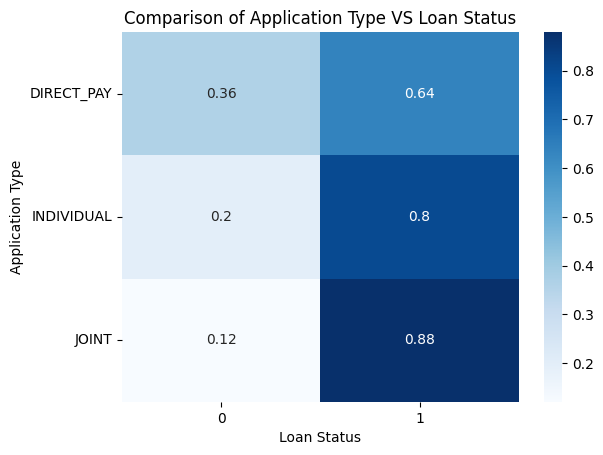

In [92]:
plt.title('Comparison of Application Type VS Loan Status')
sns.heatmap(pd.crosstab(data['application_type'],data['loan_status'], normalize='index'), annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Application Type')
plt.yticks(rotation=0)
plt.show()

- Joint accounts hace higher chances of getting paid

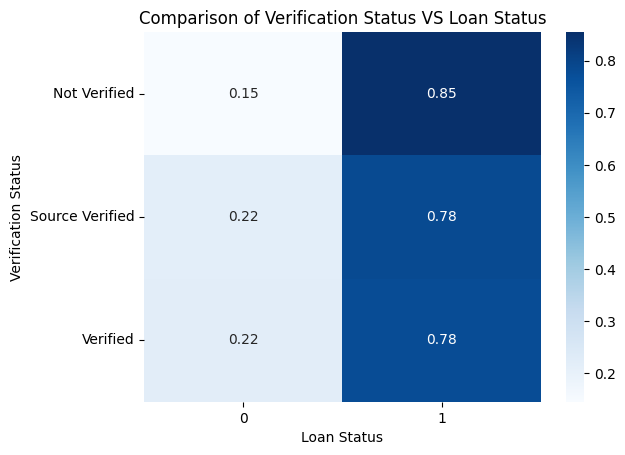

In [93]:
plt.title('Comparison of Verification Status VS Loan Status')
sns.heatmap(pd.crosstab(data['verification_status'],data['loan_status'], normalize='index'), annot=True, cmap='Blues')
plt.xlabel('Loan Status')
plt.ylabel('Verification Status')
plt.yticks(rotation=0)
plt.show()

- Not verified sources get the loan paid faster

# Data Preprocessing and Encoding

In [94]:
Y = data['loan_status']
X = data.drop(columns='loan_status')

In [95]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [96]:
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val,Y_train_val, test_size=0.2, random_state=42)

In [97]:
encoding_cols = ['grade','sub_grade','home_ownership','verification_status','purpose','application_type','zip_code', 'initial_list_status']

from category_encoders import TargetEncoder

encoder=TargetEncoder()

for i in encoding_cols:
    X_train[i]=encoder.fit_transform(X_train[i],Y_train)
    X_val[i]=encoder.transform(X_val[i])
    X_test[i]=encoder.transform(X_test[i])

- Target encoding of categorical columns (I have included zip code, year and month as they also have limited categorical values and are not continous with more number of values)
- Target encoding should only be applied to category or object dtypes, it won't work on continuous data type like int or float.
- In our dataset zipcode is an object and not int or float.

In [98]:
number_cols = X_train.columns.to_list()

[number_cols.remove(x) for x in ['grade','sub_grade','home_ownership','verification_status','purpose','application_type','zip_code', 'initial_list_status']]

number_cols

['loan_amnt',
 'term',
 'int_rate',
 'emp_length',
 'annual_inc',
 'dti',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'mort_acc',
 'pub_rec_bankruptcies',
 'earliest_cr_line_month',
 'earliest_cr_line_year',
 'issue_d_month',
 'issue_d_year']

In [99]:
minmax = MinMaxScaler()

In [100]:
X_train_scaled = minmax.fit_transform(X_train[number_cols])
X_val_scaled = minmax.transform(X_val[number_cols])
X_test_scaled = minmax.transform(X_test[number_cols])

- We scale the numerical columns of train data and do same for validation/test data

In [101]:
X_train[number_cols] = X_train_scaled
X_val[number_cols] = X_val_scaled
X_test[number_cols] = X_test_scaled

In [102]:
from sklearn.linear_model import LogisticRegression

In [103]:
model = LogisticRegression(n_jobs=-1,random_state=42,max_iter=500)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=500, n_jobs=-1, random_state=42)

In [104]:
Y_hat = model.predict(X_val)
print(f'Model score: {model.score(X_val, Y_val)}')

Model score: 0.8884392283825712


In [105]:
Y_proba = model.predict_proba(X_val)
Y_proba = Y_proba[:,1]

In [106]:
print(classification_report(Y_val, Y_hat))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     11640
           1       0.88      0.99      0.93     47664

    accuracy                           0.89     59304
   macro avg       0.91      0.73      0.78     59304
weighted avg       0.89      0.89      0.87     59304



- The model has pretty high precision , recall and F1 score

In [107]:
conf_matrix = confusion_matrix(Y_val,Y_hat)

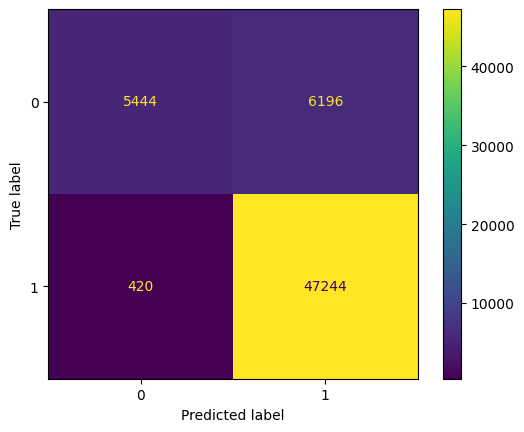

In [108]:
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

In [109]:
from sklearn.metrics import RocCurveDisplay, roc_curve, auc, PrecisionRecallDisplay, precision_recall_curve

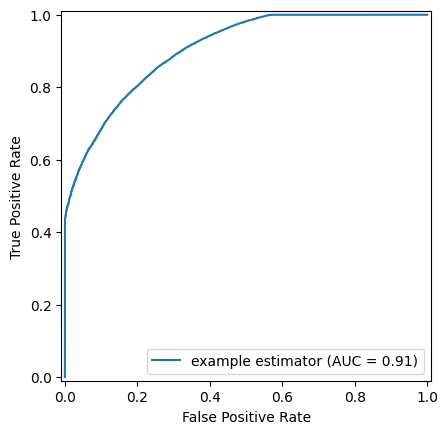

In [110]:
fpr, tpr, thresholds = roc_curve(Y_val, Y_proba)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                  estimator_name='example estimator')
display.plot()

- The threshold value around 0.2 can be used 
- This graph shows us the TPR vs FPR rate comparison

In [112]:
X_train_sam = X_train.copy()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
    while True:     
        VIF = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        
        if max(VIF) < 12:
            break
        max_index = np.argmax(VIF)
        col = X.columns[max_index]
        X.drop(columns=[col], inplace=True)


    vif = pd.DataFrame()
    vif['Feature'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by='VIF', ascending = False)
    return vif

calc_vif(X_train_sam)

- We drop the columns which have VIF score > 12
- This ensures that the data does not have multicolinearity

In [113]:
X_train = X_train_sam.copy()

In [114]:
X_val = X_val[X_train.columns]
X_test = X_test[X_train.columns]

In [115]:
model2 = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=1)

In [116]:
model2.fit(X_train, Y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=1)

- We again train the model with only the features that are not multicolinear
- This gives us same score as multicolinearity only affects analysis and not the model prediction

In [118]:
model2.score(X_val, Y_val)

0.8884392283825712

In [119]:
print(classification_report(Y_val, model2.predict(X_val)))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62     11640
           1       0.88      0.99      0.93     47664

    accuracy                           0.89     59304
   macro avg       0.91      0.73      0.78     59304
weighted avg       0.89      0.89      0.87     59304



- The precision, recall and F1 scores are also the same

In [120]:
confusion_matrix(Y_val, model2.predict(X_val))

array([[ 5444,  6196],
       [  420, 47244]], dtype=int64)

In [121]:
from imblearn.over_sampling import SMOTE

In [122]:
smt = SMOTE()

X_train_new, Y_train_new = smt.fit_resample(X_train, Y_train)

- As the data was imbalanced 80-20 we needed either over or under sampling
- We chose SMOTE as it ensures that the data is not repeated 
- SMOTE also introduces new data points to balance out the two categories

In [123]:
Y_train_new.value_counts()

loan_status
1    190875
0    190875
Name: count, dtype: int64

In [124]:
model3 = LogisticRegression(max_iter=1000,random_state=1,n_jobs=-1,)
model3.fit(X_train_new, Y_train_new)
predictions = model3.predict(X_val)

# Classification Report
print(classification_report(Y_val, predictions))

              precision    recall  f1-score   support

           0       0.51      0.79      0.62     11640
           1       0.94      0.81      0.87     47664

    accuracy                           0.81     59304
   macro avg       0.72      0.80      0.74     59304
weighted avg       0.86      0.81      0.82     59304



In [125]:
model3.score(X_val, Y_val)

0.8076858222042358

- We get a lesser model score after SMOTE because the data is more balanced 
- Both the classes are pushing the boundary away from each other leading to a balanced line of separation

# Hyper parameter Tuning

In [126]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

#We consider F1 score as we want to verify both precision and recall in case of loans
from sklearn.metrics import f1_score
train_scores = []
val_scores = []
scaler = StandardScaler()

for la in np.arange(0.01, 2000.0, 100): # range of values of Lambda
  scaled_lr = make_pipeline(scaler, LogisticRegression(C=1/la,solver='saga', max_iter=1000, n_jobs=-1))
  scaled_lr.fit(X_train_new, Y_train_new)
  train_score = f1_score(Y_train_new, scaled_lr.predict(X_train_new))
  val_score = f1_score(Y_val, scaled_lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

- We do hyperparameter training as we want to find the most optimal C value

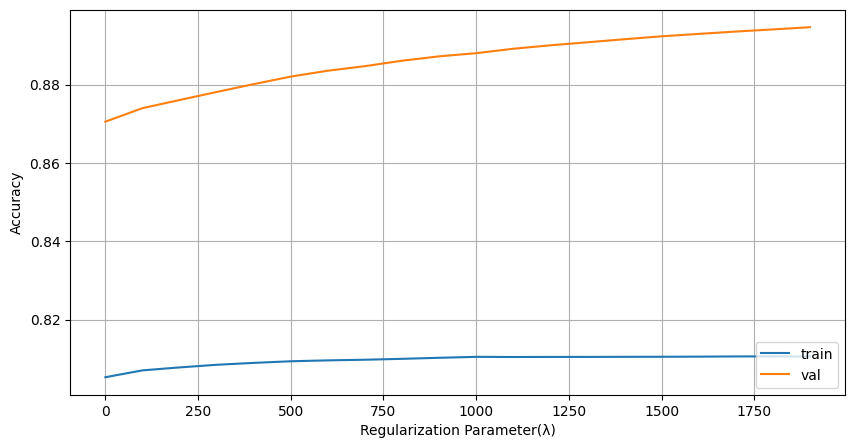

In [128]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 2000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 2000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [129]:
model3 = LogisticRegression(max_iter=1000,random_state=1,n_jobs=-1, C=1/2000)
model3.fit(X_train_new, Y_train_new)
predictions = model3.predict(X_test)

# Classification Report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63     14316
           1       0.92      0.90      0.91     59814

    accuracy                           0.85     74130
   macro avg       0.76      0.78      0.77     74130
weighted avg       0.86      0.85      0.85     74130



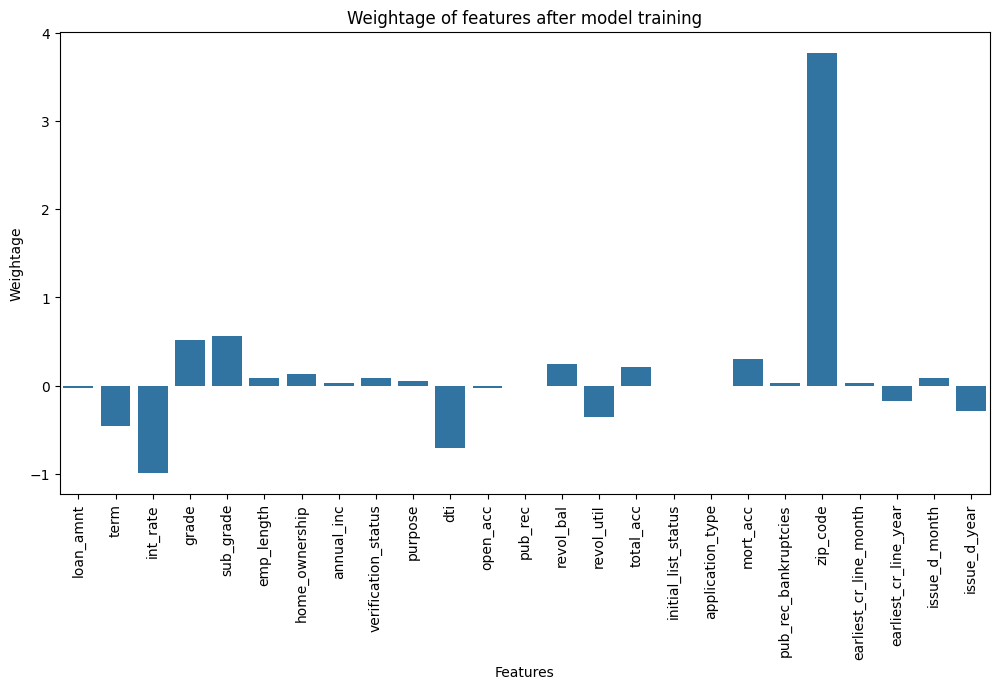

In [130]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Weightage")
plt.title("Weightage of features after model training")
sns.barplot(x=X_train.columns, y =model3.coef_[0])
plt.show()

- zip code has the highest impact on loan clearing
- this indicates that localities with higher status are where people take more loans and also clear them

In [133]:
model3.intercept_

array([-2.61898171])

In [132]:
Y_hat_test =model3.predict(X_test) 

In [134]:
conf = confusion_matrix(Y_test, Y_hat_test)

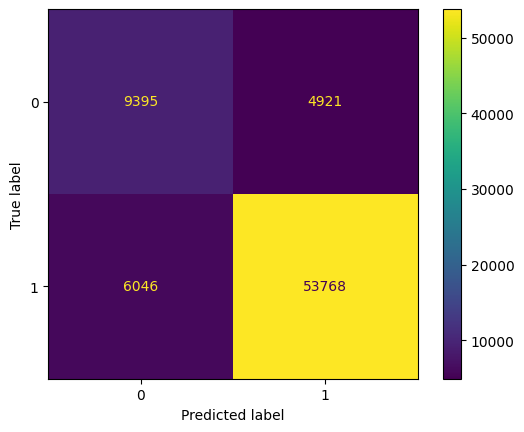

In [135]:
ConfusionMatrixDisplay(conf).plot()

In [136]:
model3.score(X_test, Y_test)

0.8520571968164036

- The final trained model comes up with a score of 85.2% which is OK
- We can also so polynomial regression so as to increase the model performance

In [137]:
print(classification_report(Y_test, Y_hat_test))

              precision    recall  f1-score   support

           0       0.61      0.66      0.63     14316
           1       0.92      0.90      0.91     59814

    accuracy                           0.85     74130
   macro avg       0.76      0.78      0.77     74130
weighted avg       0.86      0.85      0.85     74130



In [143]:
pipe = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),LogisticRegression(max_iter=1000,random_state=1,n_jobs=-1, C=1/2000))
pipe.fit(X_train_new, Y_train_new)
predictions = pipe.predict(X_test)

# Classification Report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.50      0.79      0.62     14316
           1       0.94      0.81      0.87     59814

    accuracy                           0.81     74130
   macro avg       0.72      0.80      0.74     74130
weighted avg       0.86      0.81      0.82     74130



In [144]:
pipe.score(X_test, Y_test)

0.8083501956023202

- After applying Polynomial regression also the final score becomes less